In [1]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

import os, json
import random

# from deepface import DeepFace

# import pandas as pd

%matplotlib inline

In [2]:
# img = cv2.cvtColor(cv2.imread(os.path.join('../RAW_DATA/3d5a815b5f203325df6d4e75cea782db7faeb451.jpeg'), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

In [3]:
# img = cv2.resize(img, (128,128))
# plt.imshow(img)

In [4]:
# data = {
#     'image':"1.jpg",
#     "v":np.ravel(img/255).tolist()
# }

In [5]:
# data

In [6]:
# with open('1.json', 'w+') as op:
#     json.dump(data, op)
# op.close()

In [7]:
# np.astype(img, np.int8)

In [8]:
# ! pip install matplotlib
# ! pip uninstall jedi -y
# ! pip freeze

In [9]:
# https://www.pinterest.com/pin/778700591793046882/

In [10]:
class Faces(object):
    
    def __init__(self, face_cascade, face_dir, output_dir,):
        self.face_cascade = face_cascade
        self.image_num = 1
        self.dir_num = 1
        self.face_dir = face_dir
        self.output_dir = output_dir
        self.image_name = 'Face'
        self.error = []
        
    def face_co_ordinates(self, gray):
        return self.face_cascade.detectMultiScale(gray, 1.2, 4)
#         return face_classifier.detectMultiScale(gray, 1.2, 4)
    
    def draw_rectangle(self, image, co_ordinate):
        x,y,w,h = co_ordinate
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
        return None
    
    def crop_face(self, image, co_ordinate):
        x,y,w,h = co_ordinate
        return image[y:y+h, x:x+w]
    
    def all_faces(self, draw_face=False):
        images = os.listdir(self.face_dir)
        print(self.dir_num, self.face_dir,'  starts with: ', self.image_num,'  having images:', len(images))
        for image_name in images:
            if image_name[-4:] == '.jpg':
                image = cv2.imread(os.path.join(self.face_dir, image_name))
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                co_ordinates = self.face_co_ordinates(gray)

                if len(co_ordinates) > 0:
                    for co_ordinate in co_ordinates:
                        if draw_face:
                            self.draw_rectangle(image, co_ordinate)
                            cv2.imshow('Sunny', image)
                            cv2.waitKey(500)
                        else:
                            try:
                                crop_image = self.crop_face(image, co_ordinate)
                                name = os.path.join(self.output_dir, self.image_name + str(self.image_num) +'.jpg')
                                cv2.imwrite(name, crop_image)
                                self.image_num += 1
                            except:
                                self.error.append(image_name)
                                continue
        print('No. of errors: ', len(self.error))
        print('====================================================================================================')
        data = {'Errors': self.error}
        df = pd.DataFrame(data)
        img_dir = self.face_dir.replace('./IMAGES/', '')
        err_file = os.path.join(self.output_dir, 'error_'+img_dir[:-1]+'.csv')
        df.to_csv(err_file)
        cv2.destroyAllWindows()
        return None

In [11]:
classifier_path = '../HAARCASCADE/'
classifier = os.listdir(classifier_path)
face_classifier = cv2.CascadeClassifier(os.path.join(classifier_path, classifier[0]))

In [12]:
img_path = "/home/innefu/Documents/PROJECT/INNEFU/MY_BUILD/Face/Fashion_dummy"
imgs = os.listdir(img_path)
imgs

['fem1.jpg', 'man1.jpeg', 'fem2.jpg']

In [60]:
# img = cv2.cvtColor(cv2.imread(os.path.join(img_path, imgs[0]), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
img = cv2.imread(os.path.join(img_path, imgs[0]), cv2.IMREAD_COLOR)
gray = cv2.imread(os.path.join(img_path, imgs[0]), cv2.IMREAD_GRAYSCALE)

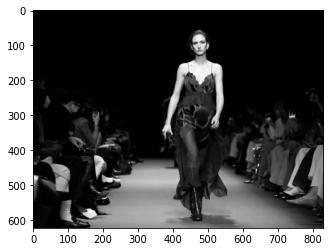

In [61]:
plt.imshow(gray, cmap='gray')

In [62]:
faces_arr = face_classifier.detectMultiScale(gray, 1.2, 4)
faces_arr

array([[445,  71,  59,  59]], dtype=int32)

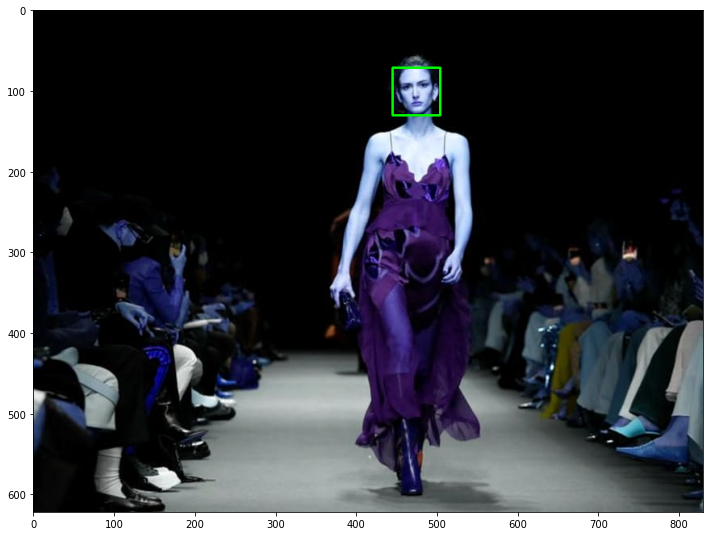

In [63]:
plt.figure(figsize=(12,12))
for i in faces_arr:
    x,y,w,h = i
    plt.imshow(cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2))

In [64]:
x,y,w,h = i
neck = np.array([int(x+(w/8)), (y+h), int(w-(w/4)), int(h*0.4)])
x1, y1, w1, h1 = neck

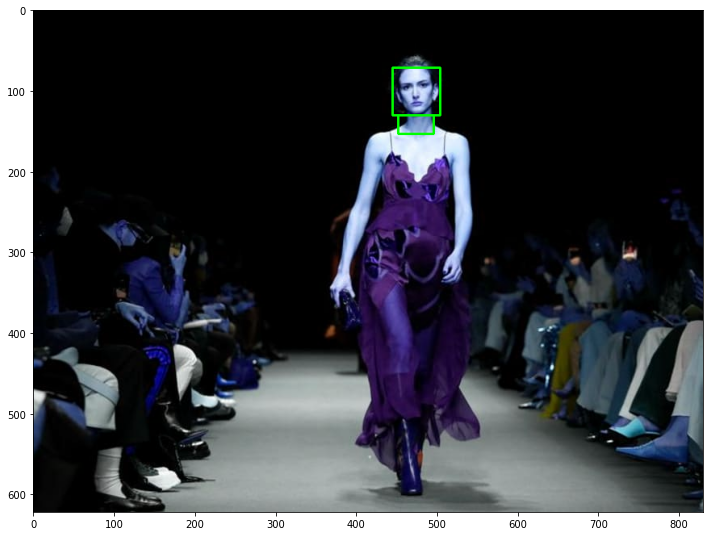

In [65]:
plt.figure(figsize=(12,12))
plt.imshow(cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2))
plt.imshow(cv2.rectangle(img, (x1,y1), (x1+w1, y1+h1), (0,255,0), 2))

In [66]:
x2, y2, w2, h2 = np.array([int(x - (w/2)), (y+h+h1), 2*w, 2*h])
x2, y2, w2, h2

(415, 153, 118, 118)

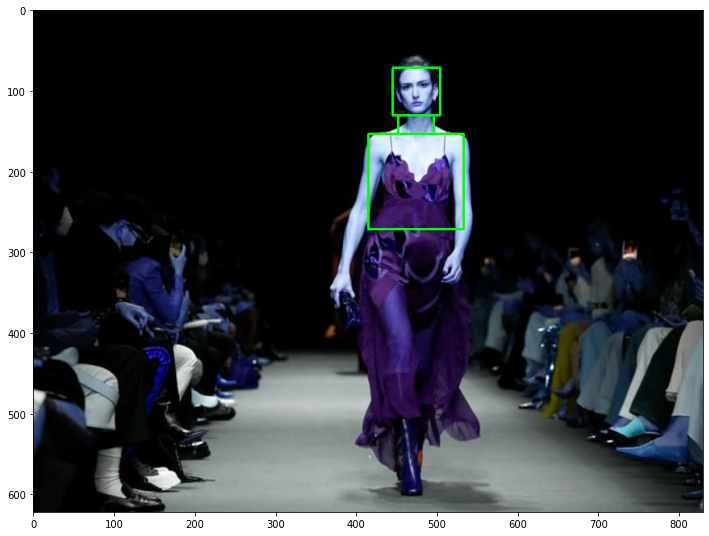

In [67]:
plt.figure(figsize=(12,12))
plt.imshow(cv2.rectangle(img, (x2,y2), (x2+w2, y2+h2), (0,255,0), 2))

In [68]:
x3, y3, w3, h3 = np.array([x2, y2+h2, w2, h])
x3, y3, w3, h3

(415, 271, 118, 59)

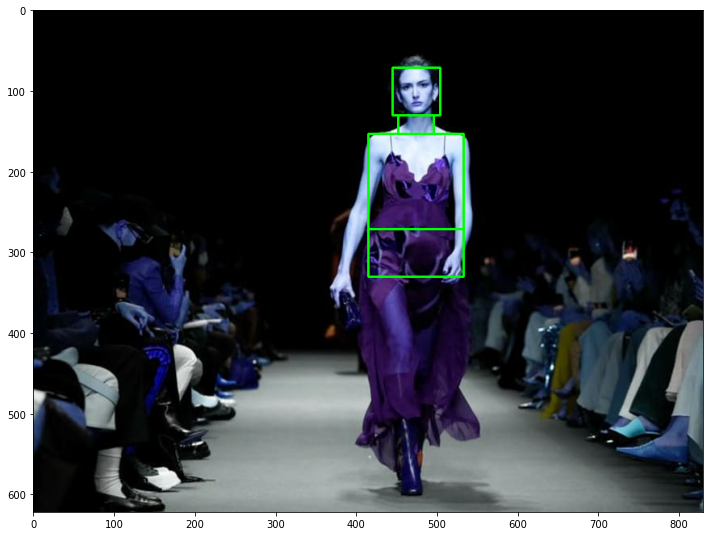

In [69]:
plt.figure(figsize=(12,12))
plt.imshow(cv2.rectangle(img, (x3,y3), (x3+w3, y3+h3), (0,255,0), 2))

In [70]:
x4, y4, w4, h4 = np.array([x3, y3+h3, w3, 4*h])
x4, y4, w4, h4

(415, 330, 118, 236)

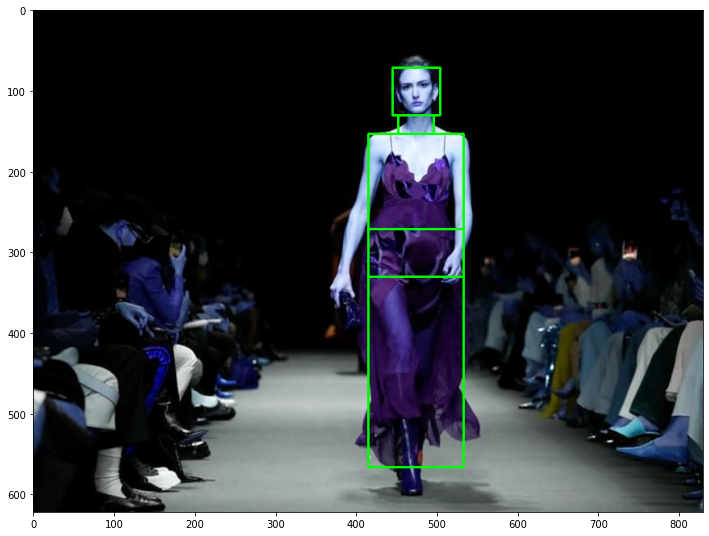

In [71]:
plt.figure(figsize=(12,12))
plt.imshow(cv2.rectangle(img, (x4,y4), (x4+w4, y4+h4), (0,255,0), 2))

In [72]:
x5, y5, w5, h5 = np.array([x4, y4+h4, w4, int(h/2)])
x5, y5, w5, h5

(415, 566, 118, 29)

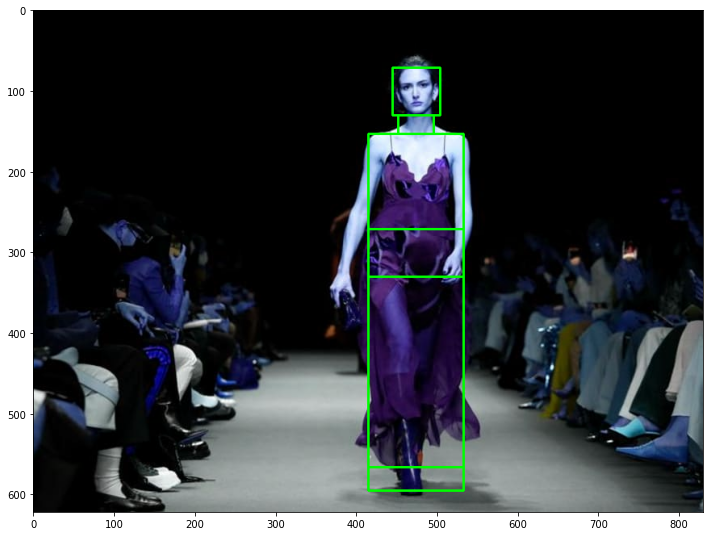

In [73]:
plt.figure(figsize=(12,12))
plt.imshow(cv2.rectangle(img, (x5,y5), (x5+w5, y5+h5), (0,255,0), 2))

In [ ]:
class Faces(object):
    
    def __init__(self, face_cascade, face_dir, output_dir,):
        self.face_cascade = face_cascade
        self.image_num = 1
        self.dir_num = 1
        self.face_dir = face_dir
        self.output_dir = output_dir
        self.image_name = 'Face'
        self.error = []
        
    def face_co_ordinates(self, gray):
        return self.face_cascade.detectMultiScale(gray, 1.2, 4)
#         return face_classifier.detectMultiScale(gray, 1.2, 4)
    
    def draw_rectangle(self, image, co_ordinate):
        x,y,w,h = co_ordinate
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
        return None
    
    def crop_face(self, image, co_ordinate):
        x,y,w,h = co_ordinate
        return image[y:y+h, x:x+w]
    
    def all_faces(self, draw_face=False):
        images = os.listdir(self.face_dir)
        print(self.dir_num, self.face_dir,'  starts with: ', self.image_num,'  having images:', len(images))
        for image_name in images:
            if image_name[-4:] == '.jpg':
                image = cv2.imread(os.path.join(self.face_dir, image_name))
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                co_ordinates = self.face_co_ordinates(gray)

                if len(co_ordinates) > 0:
                    for co_ordinate in co_ordinates:
                        if draw_face:
                            self.draw_rectangle(image, co_ordinate)
                            cv2.imshow('Sunny', image)
                            cv2.waitKey(500)
                        else:
                            try:
                                crop_image = self.crop_face(image, co_ordinate)
                                name = os.path.join(self.output_dir, self.image_name + str(self.image_num) +'.jpg')
                                cv2.imwrite(name, crop_image)
                                self.image_num += 1
                            except:
                                self.error.append(image_name)
                                continue
        print('No. of errors: ', len(self.error))
        print('====================================================================================================')
        data = {'Errors': self.error}
        df = pd.DataFrame(data)
        img_dir = self.face_dir.replace('./IMAGES/', '')
        err_file = os.path.join(self.output_dir, 'error_'+img_dir[:-1]+'.csv')
        df.to_csv(err_file)
        cv2.destroyAllWindows()
        return None

In [ ]:
class VideoFace(Faces):
    
    def __init__(self, video_path, face_cascade, face_dir, output_dir):
        Faces.__init__(self, face_cascade, face_dir, output_dir)
        self.video = video_path
        self.video_num = 1
        
    def get_video_face(self, draw_face=False):
        
        cap = cv2.VideoCapture(self.video)
        print(self.video_num, 'Video Running -->', self.video)
        while True:
            success, image = cap.read()
            try:
                image = np.uint8(image)
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            except:
                break
                
            co_ordinates = self.face_co_ordinates(gray)

            if len(co_ordinates) > 0:
                for co_ordinate in co_ordinates:
                    if draw_face:
                        self.draw_rectangle(image, co_ordinate)
                        cv2.imshow('Sunny', image)
                        cv2.waitKey(1)
                    else:
                        try:
                            crop_image = self.crop_face(image, co_ordinate)
                            name = os.path.join(self.output_dir, self.image_name + str(self.image_num) +'.jpg')
                            cv2.imwrite(name, crop_image)
                            self.image_num += 1
                        except:
                            self.error.append(image_name)
                            continue

        cap.release()
        cv2.destroyAllWindows()
        return None

In [ ]:
def get_all_video_faces():
    classifier_path = './HAARCASCADE/'
    classifier = os.listdir(classifier_path)
    face_classifier = cv2.CascadeClassifier(os.path.join(classifier_path, classifier[0]))
    
    images_dir_path = './IMAGES/'
    output_dir = './FACES2/'
    video_dir_path = './MY/VIDEO/'
    image_num = 50000
    dir_num = 1
    vid_num = 1
    images_path = './None'
    
    video_dir = os.listdir(video_dir_path)
    
    for video in video_dir:
        video_path = os.path.join(video_dir_path, video)
        vf = VideoFace(video_path, face_classifier, images_path, output_dir)
        vf.image_num = image_num
        vf.vid_num = vid_num
        vf.get_video_face(draw_face=False)
        
        image_num = vf.image_num
        vid_num += 1
    cv2.destroyAllWindows()
    return None

In [ ]:
# get_all_video_faces()

In [ ]:
path = './'
os.listdir(path)

In [ ]:
def get_all_faces():
    classifier_path = './HAARCASCADE/'
    classifier = os.listdir(classifier_path)
    face_classifier = cv2.CascadeClassifier(os.path.join(classifier_path, classifier[0]))
    
    images_dir_path = './MY/'
    output_dir = './FACES2/'
    image_num = 50000
    dir_num = 1
    
    images_dirs = os.listdir(images_dir_path)
    
    for image_dir in images_dirs:
        images_path = os.path.join(images_dir_path, image_dir)
        fc = Faces(face_classifier, images_path, output_dir)
        fc.image_num = image_num
        fc.dir_num = dir_num
        fc.all_faces()
        image_num = fc.image_num
        dir_num += 1
        

In [ ]:
# get_all_faces()

In [ ]:
final_face_path = './FINAL-FACES/'

In [ ]:
final_face_images = os.listdir(final_face_path)

In [ ]:
imgs_name  = []
imgs_shape = []
for i in final_face_images:
    img = cv2.imread(os.path.join(final_face_path, i))
    imgs_name.append(i)
    imgs_shape.append(img.shape[0])

In [ ]:
plt.plot(np.arange(len(imgs_shape)), sorted(imgs_shape))

In [ ]:
data = {
    'image': imgs_name,
    'shape': imgs_shape,
}

df = pd.DataFrame(data)

In [ ]:
x = np.array(imgs_shape)

In [ ]:
x[x>1000]

In [ ]:
df[df['shape']>1000]

In [ ]:
sunny_img = cv2.imread(os.path.join(sunny_images_path, 'Image99.jpg'))

In [ ]:
for i in sunny_images[51:200]:
    sunny_img = cv2.imread(os.path.join(sunny_images_path, i))
    
    gray = cv2.cvtColor(sunny_img, cv2.COLOR_BGR2GRAY)
    
    faces = face_classifier.detectMultiScale(gray, 1.1, 4)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(sunny_img, (x,y), (x+w, y+h), (0, 255,0), 3)
    cv2.imshow('sunny', sunny_img)
    cv2.waitKey(1500)
cv2.destroyAllWindows()

In [ ]:
sunny_img.shape

In [ ]:
x,y,w,h

In [ ]:
raw = sunny_img[y:y+h, x:x+w]

In [ ]:
plt.imshow(raw)

In [ ]:
plt.imshow(sunny_img)

In [ ]:
p = 'k/l/m/'

In [ ]:
os.path.basename(p)

In [ ]:
plt.imshow(sunny_img)

In [ ]:
gray = cv2.cvtColor(sunny_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
# gray = cv2.flip(gray, 1)

In [ ]:
faces = face_classifier.detectMultiScale(gray, 1.1, 4)

In [ ]:
faces

In [ ]:
img = sunny_img.copy()
# img = cv2.flip(img, 1)
plt.imshow(img)

In [ ]:
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255,0), 3)

In [ ]:
plt.imshow(img)

In [ ]:
raw = img[y:y+h, x:x+w]

In [ ]:
plt.imshow(raw)